### CUSTOMER SEGMENTATION ANALYSIS

### Customer Segmentation:

#### Customer segmentation is a marketing strategy that involves dividing a customer base into distinct groups based on certain characteristics or behaviors. The goal is to better understand and target specific customer needs and preferences.

#### The dataset contains the following attributes:
#### CustomerID	
#### Gender	
#### Age	
#### Annual Income (k$)	
#### Spending Score (1-100)

### Import required libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [4]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Mall_Customers.csv")

### Data Exploration 

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32
249,250,Female,31,325,86


In [7]:
#finding shape of the dataset(number of rows and columns)
df.shape

(250, 5)

In [8]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [9]:
#statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [10]:
#checking for number of null values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#Finding for duplicate values
df.duplicated().sum()

0

### Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

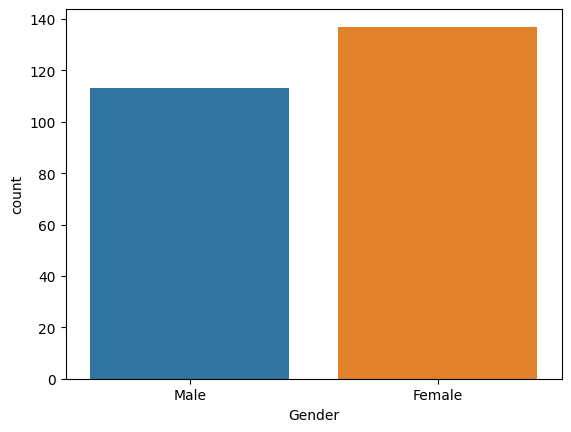

In [12]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Age', ylabel='Density'>

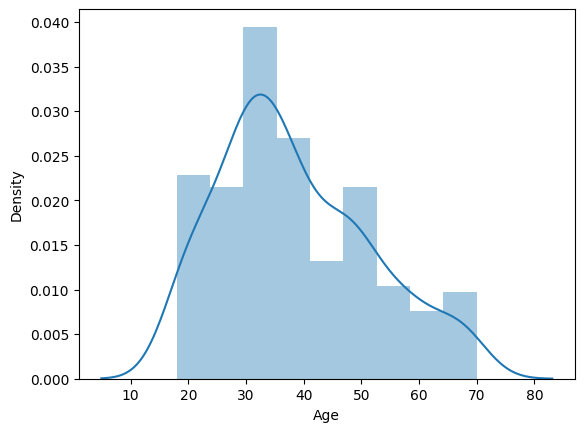

In [13]:
#Distribution plot for Age
sns.distplot(df['Age'])

##### From the above plot, we see that the majority of the customers are between 30 to 40 years old.

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

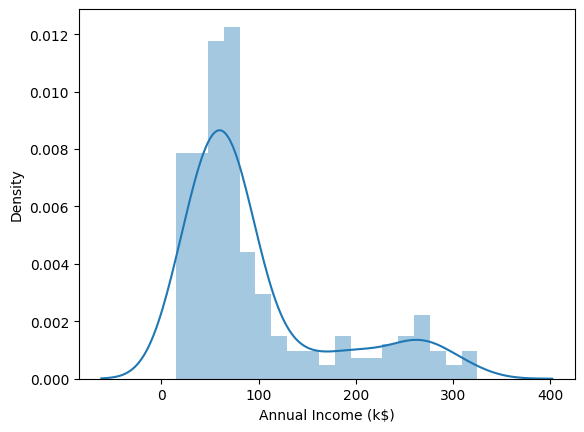

In [14]:
##Distribution plot for 'Annual Income (k$)'
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

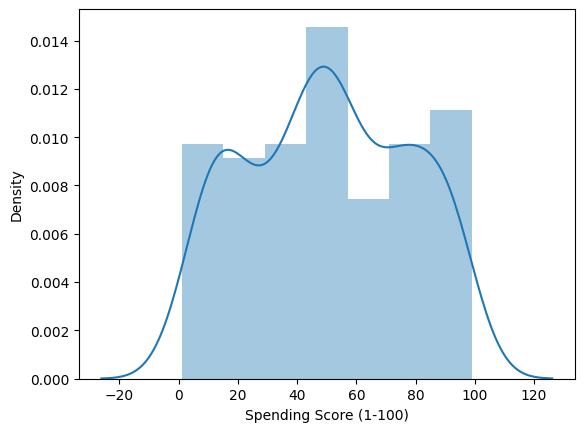

In [15]:
#Distribution plot for Spending Score (1-100)
sns.distplot(df['Spending Score (1-100)'])

In [16]:
df_1=df[['Annual Income (k$)','Spending Score (1-100)']]

### Visualizing the data points using Scatter plot

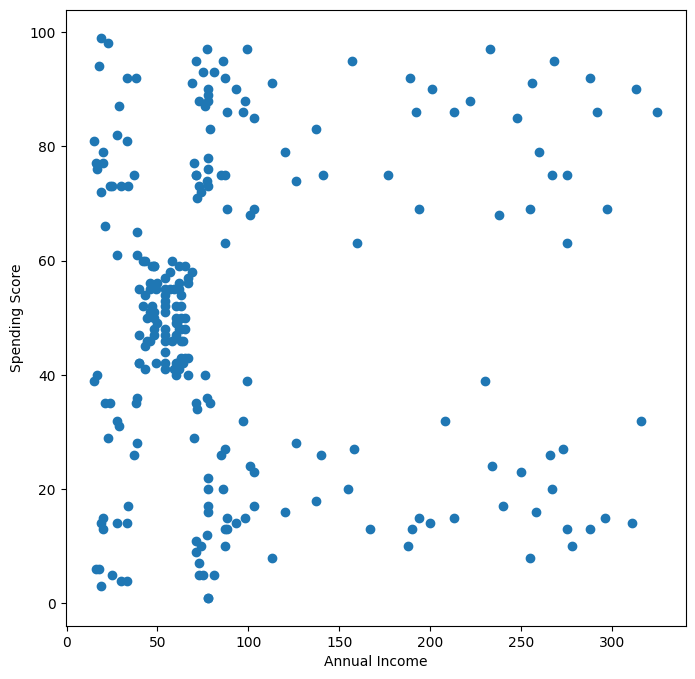

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Clustering on two features of the dataset

In [18]:
df_1=df[['Annual Income (k$)','Spending Score (1-100)']]

### Data Preprocessing

In [19]:
# Standardize the data
sc = StandardScaler()
df_1_sc = sc.fit_transform(df_1)

### Building the clustering model

#### Finding optimal number of clusters(K value) by Elbow method
#### The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.

#### Lets build the model with df_1 and decide the number of clusters to be used.

In [20]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_1_sc)
    wcss.append(kmeans.inertia_)

In [21]:
wcss

[500.0,
 292.78605297982244,
 170.3480806806568,
 110.21773900679975,
 65.48089790099365,
 55.749295191148235,
 47.28612341768105,
 41.25413328603584,
 35.76366894639013,
 29.892162980689235]

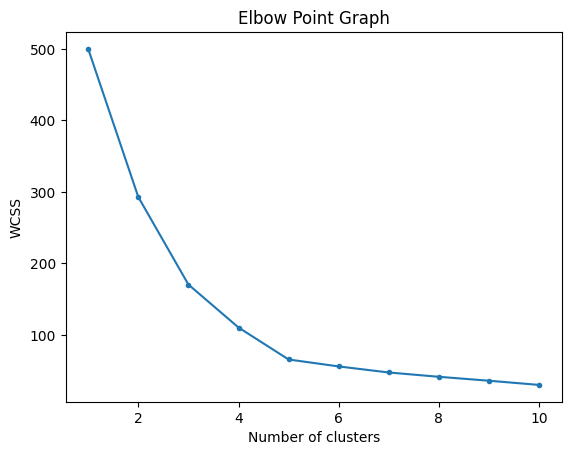

In [22]:
plt.plot(range(1,11),wcss,marker='.')
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

####  The value of K needs to be chosen where WCSS starts to diminish. In the plot WCSS versus K, this shows up as an elbow.
#### It looks like the optimal number of clusters is five.

### Model training

In [23]:
kmeans=KMeans(n_clusters=5,random_state=42)
x=kmeans.fit_predict(df_1_sc)

In [24]:
x

array([0, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0, 3, 4, 0, 4,
       3, 4, 3, 4, 0, 0, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1])

### Centroid points of the clusters

In [25]:
centroids=sc.inverse_transform(kmeans.cluster_centers_)
centroids

array([[ 53.33333333,  48.53125   ],
       [241.45833333,  81.83333333],
       [237.91666667,  19.        ],
       [ 70.125     ,  14.85416667],
       [ 67.36206897,  82.22413793]])

### Visualizing the clusters formed

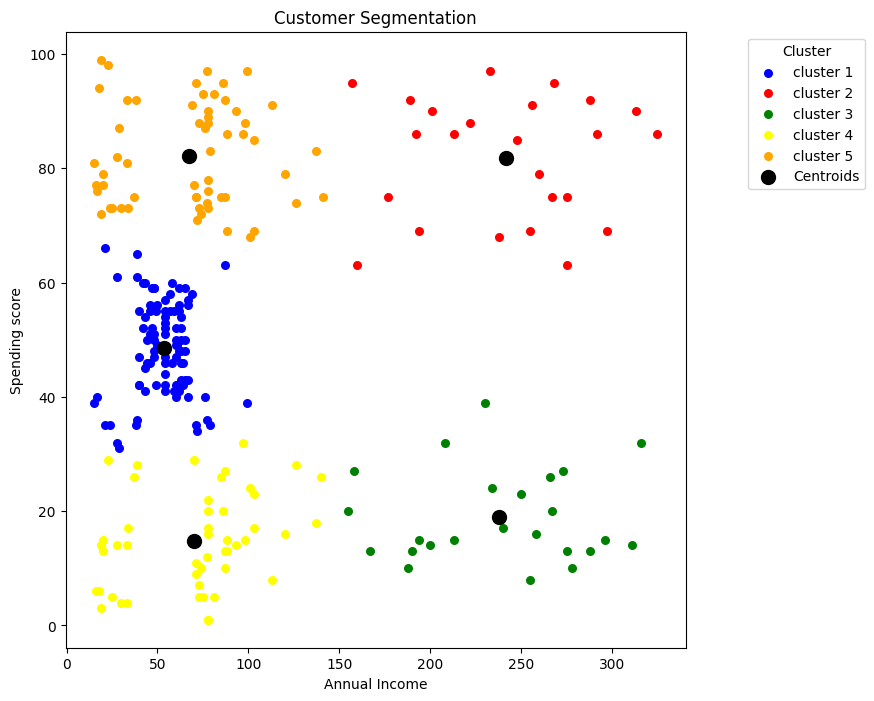

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(df_1.iloc[x==0,0],df_1.iloc[x==0,1],s=30,c='blue',label='cluster 1')
plt.scatter(df_1.iloc[x==1,0],df_1.iloc[x==1,1],s=30,c='red',label='cluster 2')
plt.scatter(df_1.iloc[x==2,0],df_1.iloc[x==2,1],s=30,c='green',label='cluster 3')
plt.scatter(df_1.iloc[x==3,0],df_1.iloc[x==3,1],s=30,c='yellow',label='cluster 4')
plt.scatter(df_1.iloc[x==4,0],df_1.iloc[x==4,1],s=30,c='orange',label='cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100,c='black',label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend(title='Cluster',loc="upper right",bbox_to_anchor=(1.3,1))
plt.show()

### Adding cluster label to each sample

In [27]:
df_1['Label']=x
df_1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,0


In [28]:
df_1.iloc[150:155,:]

,Annual Income (k$),Spending Score (1-100),Label
150,78,17,3
151,78,88,4
152,78,20,3
153,78,76,4
154,78,16,3


### Interpreting the clusters by visualizing for each variable

<Axes: xlabel='Label', ylabel='Annual Income (k$)'>

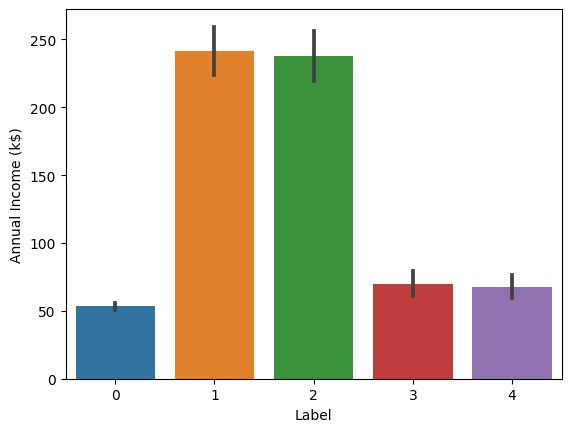

In [29]:
sns.barplot(x='Label',y='Annual Income (k$)',data=df_1)

<Axes: xlabel='Label', ylabel='Spending Score (1-100)'>

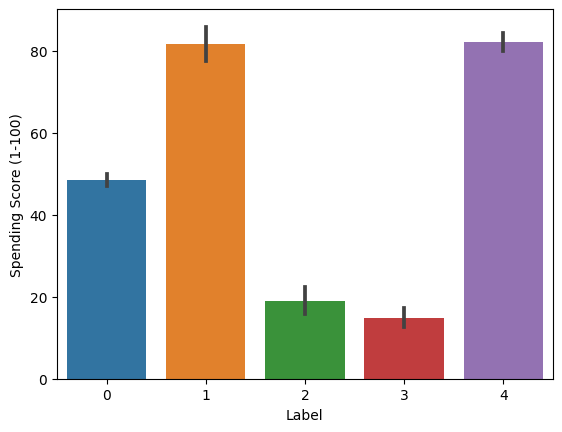

In [30]:
sns.barplot(x='Label',y='Spending Score (1-100)',data=df_1)

### Clustering on three features

In [31]:
df_2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df_2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [32]:
# Standardize the features (important for K-means)
sc = StandardScaler()
df_2_sc= sc.fit_transform(df_2)

### Finding optimal number of clusters(K value) by Elbow method

In [33]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_2_sc)
    wcss.append(kmeans.inertia_)

In [34]:
wcss

[750.0000000000002,
 475.0055895910763,
 321.99115047439375,
 252.9071876148446,
 188.52619036291887,
 155.9390850683825,
 135.12339377560272,
 117.93914701098754,
 104.15453537251342,
 96.40833691824372]

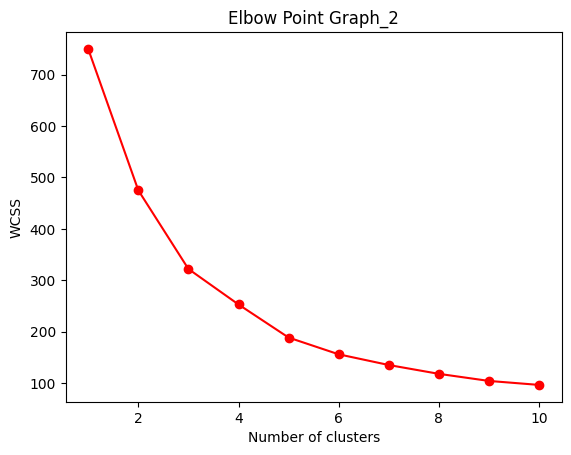

In [35]:
plt.plot(range(1,11),wcss,color='red',marker='o')
plt.title('Elbow Point Graph_2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### The best cluster appears to be five.

### Model training

In [36]:
kmeans=KMeans(n_clusters=5,random_state=42)
y=kmeans.fit_predict(df_2_sc)

In [37]:
y

array([2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3])

### Adding cluster label to each sample

In [38]:
df_2['Label']=y
df_2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,2
1,15,81,21,2
2,16,6,20,1
3,16,77,23,2
4,17,40,31,1


### Visualizing the clusters formed
#### 3d scatter plot

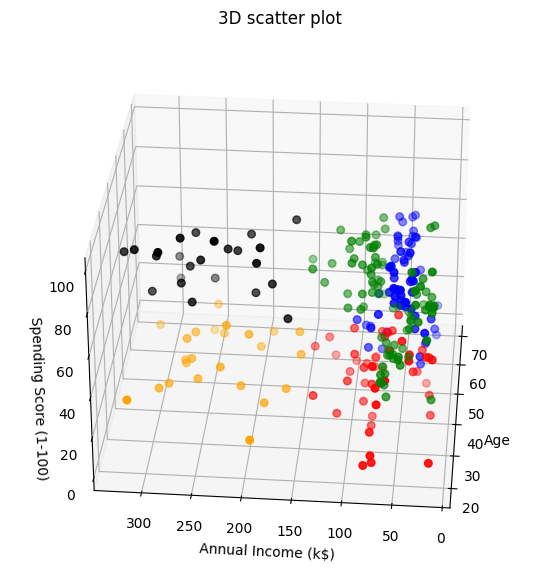

In [39]:
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df_2['Age'][df_2['Label']==0],df_2['Annual Income (k$)'][df_2['Label']==0],df_2['Spending Score (1-100)'][df_2['Label']==0],c='blue',s=30)
ax.scatter(df_2['Age'][df_2['Label']==1],df_2['Annual Income (k$)'][df_2['Label']==1],df_2['Spending Score (1-100)'][df_2['Label']==1],c='red',s=30)
ax.scatter(df_2['Age'][df_2['Label']==2],df_2['Annual Income (k$)'][df_2['Label']==2],df_2['Spending Score (1-100)'][df_2['Label']==2],c='green',s=30)
ax.scatter(df_2['Age'][df_2['Label']==3],df_2['Annual Income (k$)'][df_2['Label']==3],df_2['Spending Score (1-100)'][df_2['Label']==3],c='black',s=30)
ax.scatter(df_2['Age'][df_2['Label']==4],df_2['Annual Income (k$)'][df_2['Label']==4],df_2['Spending Score (1-100)'][df_2['Label']==4],c='orange',s=30)
ax.view_init(30,185)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D scatter plot')
plt.show()


##### The view_init() parameters can be changed for a different angle view of the scatterplot.

### Finding average of all variables across each cluster

##### To compare the attributes of different clusters, lets find the average of all variables across each cluster

In [40]:
avg_df_2=df_2.groupby(['Label']).mean()
avg_df_2

,Annual Income (k$),Spending Score (1-100),Age
Label,,,
0,53.609375,39.765625,55.796875
1,69.897959,23.530612,35.612245
2,62.213483,72.393258,28.494382
3,241.458333,81.833333,31.541667
4,237.916667,19.000000,42.250000
